In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
scour_depth_sample_number = 10

In [4]:
condition_factor = []
pier_local_scour_depth = []

In [5]:
def condition_factor_calculation():
    
    import numpy as np
    import matplotlib.pyplot as plt

    F_w = 1
    F_d = 0.8
    F_mo = 0.9

    F_j = F_w * F_d * F_mo

    d_s_loc_min = 1.20
    d_s_loc_max = 2.60

    F_CM_max = 0.90
    F_CM_min = 0.30

    x = [d_s_loc_min, d_s_loc_max]
    y = [F_CM_max, F_CM_min]

    slope_intercept = np.polyfit(x, y, 1) #https://www.w3schools.com/datascience/ds_linear_slope.asp

    m = slope_intercept[0]
    q = slope_intercept[1]

    d_s_loc_no_damage = 0
    F_CM_no_damage = 1

    d_s_loc_vector = np.linspace(d_s_loc_no_damage, d_s_loc_max, scour_depth_sample_number)

    #https://www.pythonpool.com/numpy-piecewise/
    F_CM_function = np.piecewise(d_s_loc_vector, [d_s_loc_vector <= 1.00, d_s_loc_vector > 1.00], [lambda d_s_loc_vector: 1.00, lambda d_s_loc_vector: q + m*d_s_loc_vector])

    plt.scatter(d_s_loc_vector, F_CM_function, color = 'black')
    plt.plot(d_s_loc_vector, F_CM_function, color = 'black')

    plt.xlabel('Pier local scour depth')
    plt.ylabel('Investigated cracks factor')

    F_C = F_CM_function * F_j

    plt.plot(d_s_loc_vector, F_C, color = 'black')
    plt.xlabel('Pier local scour depth')
    plt.ylabel('Condition factor')

    condition_factor.append(list(F_C))
    pier_local_scour_depth.append(list(d_s_loc_vector))

    print(len(condition_factor))

    print(condition_factor)
    print(pier_local_scour_depth)

    %store condition_factor
    %store pier_local_scour_depth

    # return F_C,d_s_loc_vector

1
[[0.7200000000000001, 0.7200000000000001, 0.7200000000000001, 0.7200000000000001, 0.6617142857142858, 0.5725714285714285, 0.4834285714285714, 0.3942857142857141, 0.3051428571428569, 0.21599999999999975]]
[[0.0, 0.2888888888888889, 0.5777777777777778, 0.8666666666666667, 1.1555555555555557, 1.4444444444444446, 1.7333333333333334, 2.0222222222222226, 2.3111111111111113, 2.6]]
Stored 'condition_factor' (list)
Stored 'pier_local_scour_depth' (list)


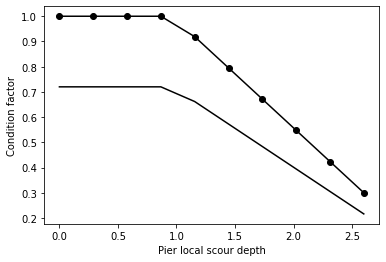

In [6]:
condition_factor_calculation()

In [7]:
condition_factor

[[0.7200000000000001,
  0.7200000000000001,
  0.7200000000000001,
  0.7200000000000001,
  0.6617142857142858,
  0.5725714285714285,
  0.4834285714285714,
  0.3942857142857141,
  0.3051428571428569,
  0.21599999999999975]]

In [8]:
len(condition_factor[0])

10

In [9]:
pier_local_scour_depth

[[0.0,
  0.2888888888888889,
  0.5777777777777778,
  0.8666666666666667,
  1.1555555555555557,
  1.4444444444444446,
  1.7333333333333334,
  2.0222222222222226,
  2.3111111111111113,
  2.6]]

In [10]:
len(pier_local_scour_depth[0])

10

In [11]:
%store

Stored variables and their in-db values:
condition_factor                   -> [[0.7200000000000001, 0.7200000000000001, 0.720000
pier_local_scour_depth             -> [[0.0, 0.2888888888888889, 0.5777777777777778, 0.8


In [12]:
type(condition_factor)

list

In [24]:
# https://www.geeksforgeeks.org/python-save-list-to-csv/
condition_factor_dict = {"scour_depth": pier_local_scour_depth[0],
                         "condition_factor": condition_factor[0]}
condition_factor_df = pd.DataFrame.from_dict(condition_factor_dict)

In [25]:
condition_factor_df

,scour_depth,condition_factor
0,0.000000,0.720000
1,0.288889,0.720000
2,0.577778,0.720000
3,0.866667,0.720000
4,1.155556,0.661714
5,1.444444,0.572571
6,1.733333,0.483429
7,2.022222,0.394286
8,2.311111,0.305143
9,2.600000,0.216000


In [27]:
#https://stackoverflow.com/questions/62290012/why-is-row-number-added-as-a-column-in-csv-file-saved-by-pandas
condition_factor_df.to_csv("condition_factor_df.csv", index=False)